In [9]:
plt.rcParams['figure.dpi'] = 200

# 1 week of Housekeeping

# 1 week one all channel at all sites

## raw2netcdf

In [17]:
version = '0.3'
days = 7
# p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/raw.netcdf/v0.3/2026/
# p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/v0.3/2026/
p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/{site}/mfrsr/raw.netcdf/v{version}/2026/'
p2fld_rad = '/Volumes/grad/surfrad/products_level1/radiation_netcdf/v1.1/{site}/2026/'
# [s.name for s in list(pl.Path('/Volumes/grad/Inst/MFR/SURFRAD/').glob('*'))]

# Load data
sites = ['gwn', 'psu', 
         'sxf', 'tbl', 'bnd', 'fpe', 'dra'
        ]
data = {}

for e,s in enumerate(sites):
    out = {}
    # print(s)
    ### mfrsr
    if 1:
        fl = list(pl.Path(p2fld.format(site = s, version = version)).glob('*.nc'))
        fl.sort()
        ds = xr.open_mfdataset(fl[- days:])
        out['mfrsr'] = ds
        data[s] = out
    if 1:
        if s == 'bnd':
            st = 'bon'
        elif s == 'fpe':
            st = 'fpk'
        else:
            st = s
        fl = list(pl.Path(p2fld_rad.format(site = st)).glob('*.nc'))
        fl.sort()
        ds = xr.open_mfdataset(fl[- days:])
        out['rad'] = ds
        data[s] = out
    ## radiation
pd.Timestamp.now()

Timestamp('2026-02-13 09:57:26.549439')

/var/folders/f4/dl3whmyd1rj_9smbyhmyqyj1h26f40/T/ipykernel_53362/4002630140.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  a.legend().remove()


Timestamp('2026-02-13 09:57:32.672804')

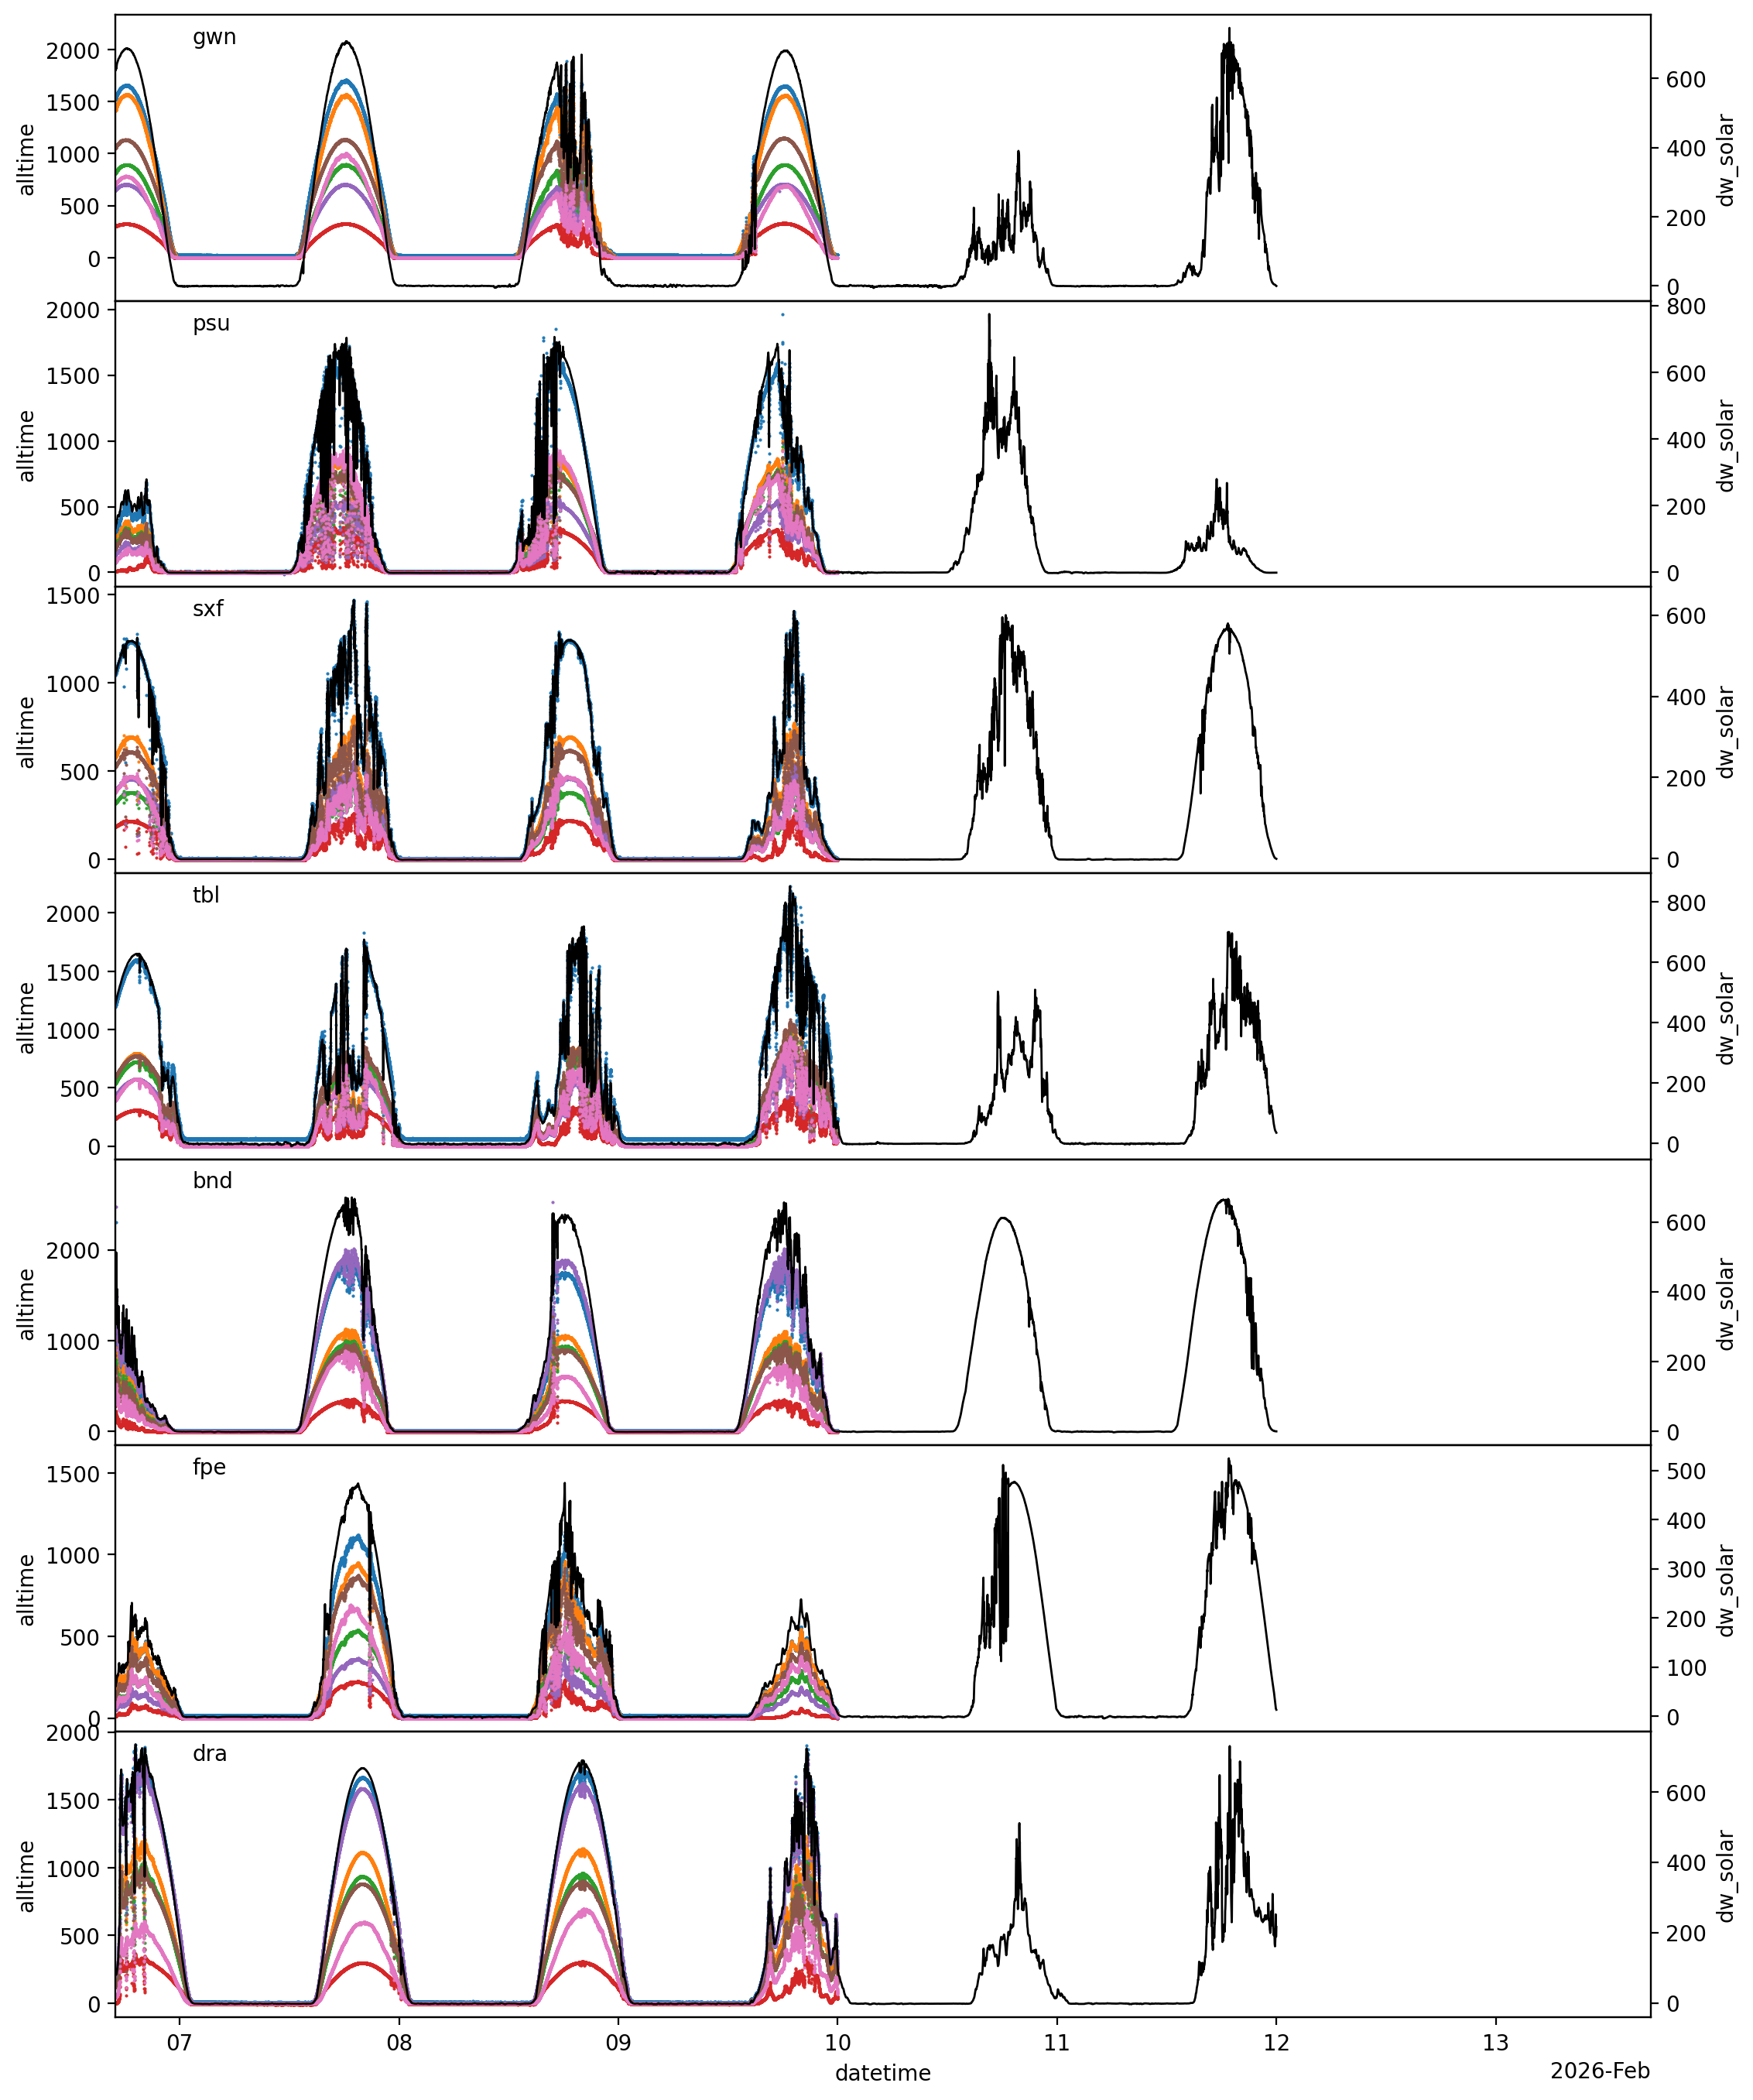

In [18]:
f, aa = plt.subplots(len(data.keys()), sharex=True, gridspec_kw={'hspace': 0})
f.set_figheight(f.get_figheight() * len(data.keys()) * 0.5)
f.set_figwidth(f.get_figwidth() *2)
                
for e,s in enumerate(data):
    a = aa[e]
    ds  = data[s]['mfrsr']
    ds.alltime.plot.line(x='datetime', ax = a, lw = 1, ls = '', marker = '.', markersize = 1)
    a.legend().remove()
    a.text(0.05, 0.9, s, transform = a.transAxes)

    if 1:
        ds = data[s]['rad']
        at = a.twinx()
        ds.dw_solar.plot(ax = at, color = 'black', lw = 1)

end = pd.Timestamp.now(tz = 'UTC')
start = end - pd.to_timedelta(days, 'D')
aa[-1].set_xlim(start, end)
pd.Timestamp.now()

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/dask/_task_spec.py:768: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/dask/_task_spec.py:768: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/var/folders/f4/dl3whmyd1rj_9smbyhmyqyj1h26f40/T/ipykernel_53362/1361802231.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  a.legend().remove()
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/dask/_task_spec.py:768: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/dask/_task_spec.py:768: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/var/folders/f4/dl3whmyd1rj_9smbyhm

Timestamp('2026-02-13 09:50:46.817912')

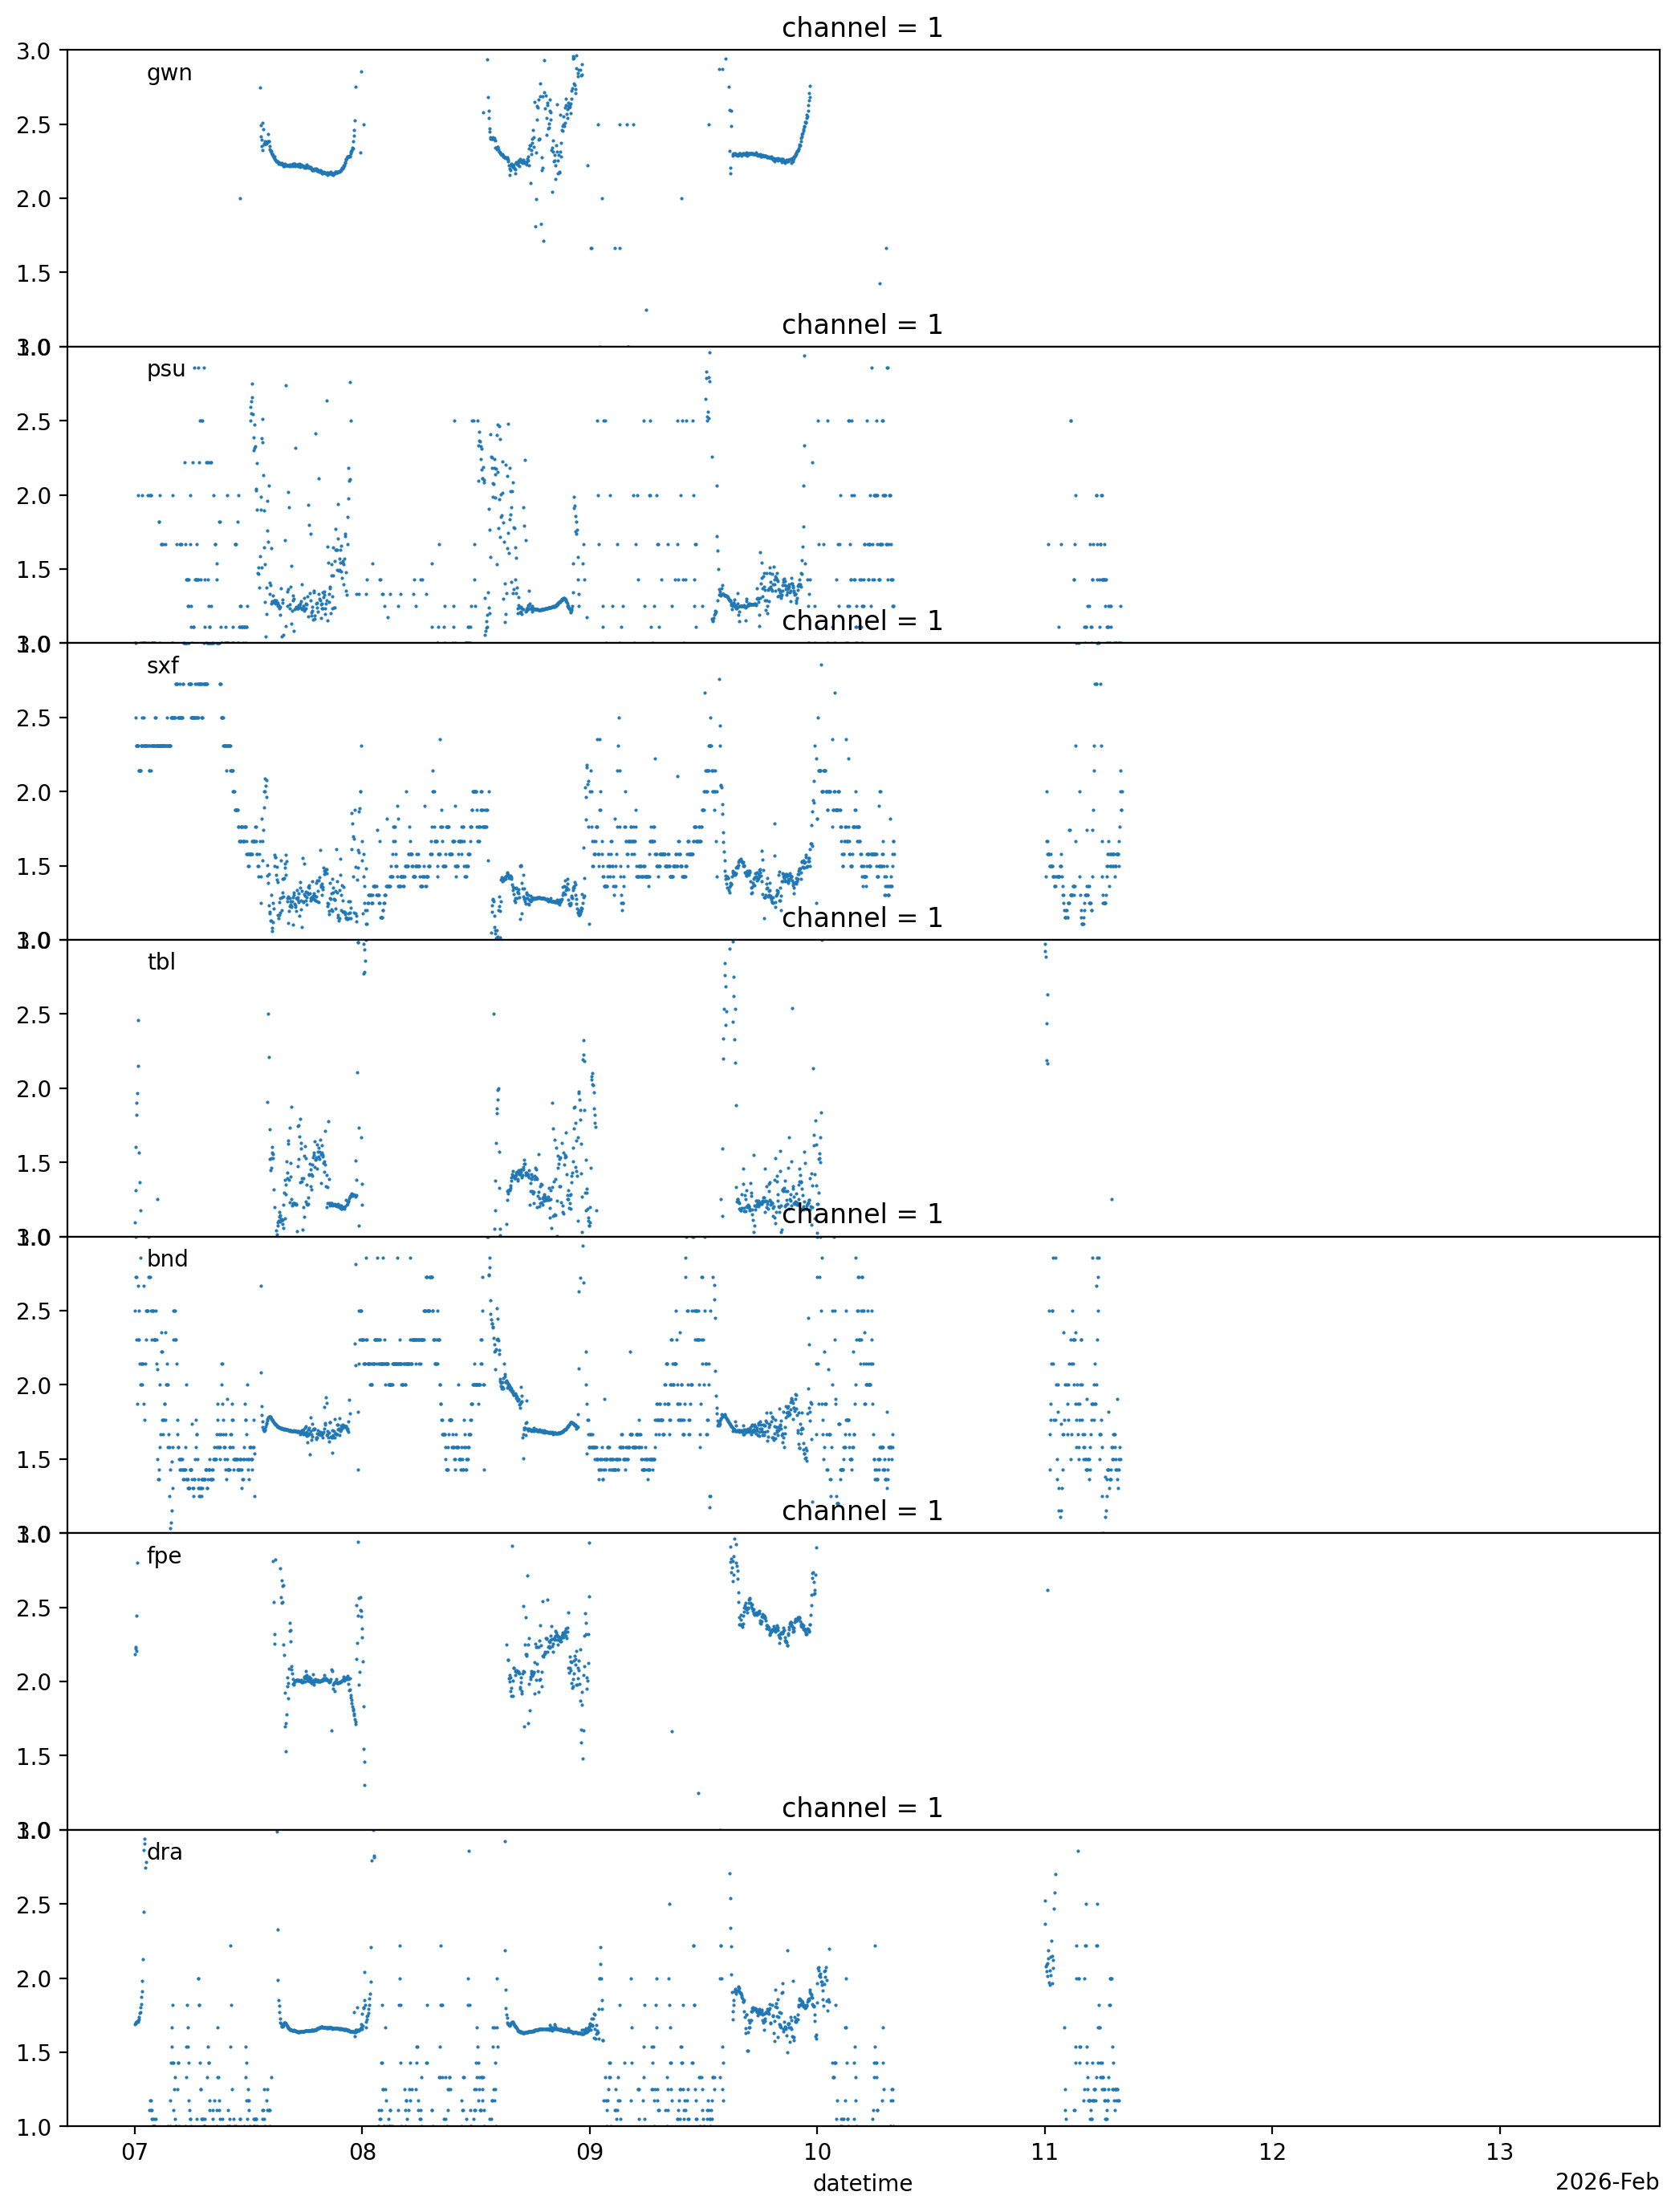

In [12]:
f, aa = plt.subplots(len(data.keys()), sharex=True, gridspec_kw={'hspace': 0})
f.set_figheight(f.get_figheight() * len(data.keys()) * 0.5)
f.set_figwidth(f.get_figwidth() *2)
                
for e,s in enumerate(data):
    a = aa[e]
    ds  = data[s]['mfrsr']
    dsr = data[s]['rad']
    (ds.alltime.sel(channel = 1) / dsr.dw_solar).plot(ax = a, lw = 1, ls = '', marker = '.', markersize = 1)
    a.legend().remove()
    a.text(0.05, 0.9, s, transform = a.transAxes)

end = pd.Timestamp.now(tz = 'UTC')
start = end - pd.to_timedelta(days, 'D')
aa[-1].set_xlim(start, end)
for a in aa:
    a.set_ylim(1,3)
pd.Timestamp.now()

/var/folders/f4/dl3whmyd1rj_9smbyhmyqyj1h26f40/T/ipykernel_53362/1963737832.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  a.legend().remove()


(np.float64(20490.701979102374), np.float64(20497.701979102374))

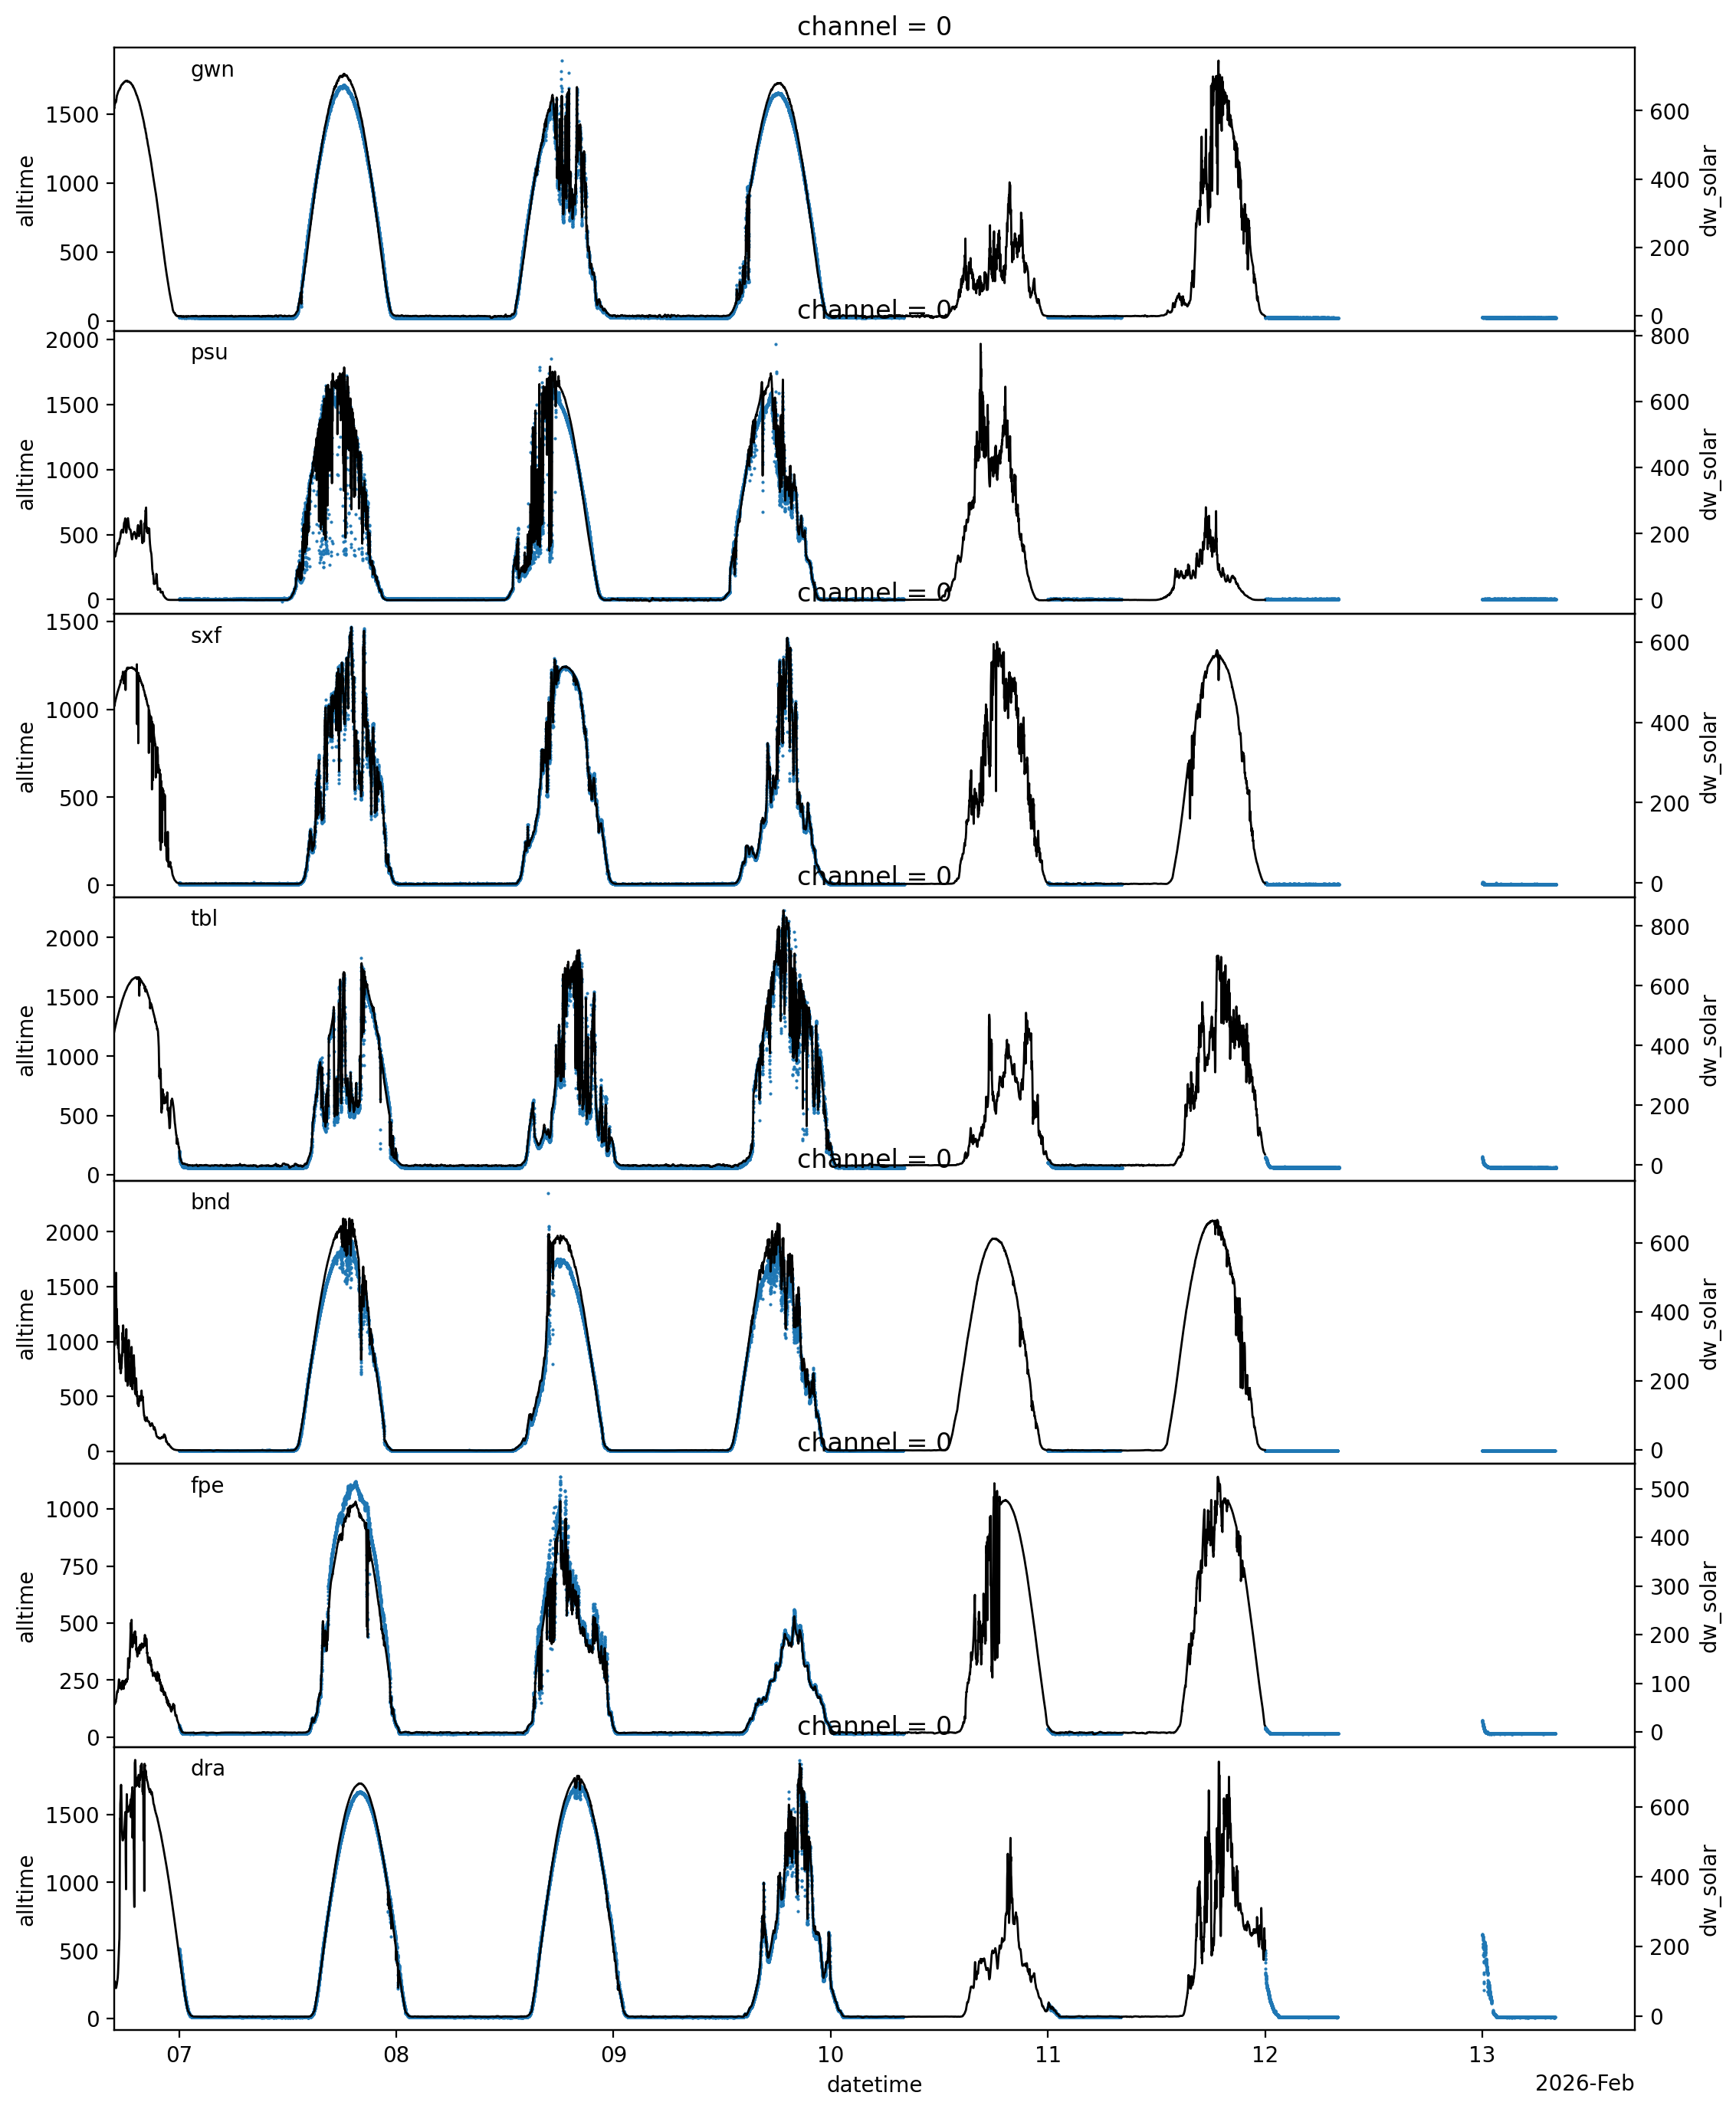

In [13]:
f, aa = plt.subplots(len(data.keys()), sharex=True, gridspec_kw={'hspace': 0})
f.set_figheight(f.get_figheight() * len(data.keys()) * 0.5)
f.set_figwidth(f.get_figwidth() *2)
                
for e,s in enumerate(data):
    a = aa[e]
    ds  = data[s]['mfrsr']
    ds.alltime.sel(channel = 0).plot(ax = a, lw = 1, ls = '', marker = '.', markersize = 1)
    a.legend().remove()
    a.text(0.05, 0.9, s, transform = a.transAxes)

    if 1:
        ds = data[s]['rad']
        at = a.twinx()
        ds.dw_solar.plot(ax = at, color = 'black', lw = 1)

end = pd.Timestamp.now(tz = 'UTC')
start = end - pd.to_timedelta(days, 'D')
aa[-1].set_xlim(start, end)

## tu

In [43]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf

In [44]:
days = 7
# p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/raw.netcdf/v0.3/2026/
p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/{site}/mfrsr/tu/2026/'


In [60]:
sites = ['gwn', 'psu', 
         'sxf', 'tbl', 'bnd', 'fpe', 'dra'
        ]
data = {}
for s in sites:
    # print(s)
    fl = list(pl.Path(p2fld.format(site = s)).glob('*'))
    fl.sort()
    fl = fl[- days:]
    flds = []
    for f in fl:
        tmp = atmsrf.read_ccc(f, raisefilterfunctionerror=False)
        flds.append(tmp.dataset)
    ds = xr.concat(flds, 'datetime')
    data[s] = ds

/var/folders/f4/dl3whmyd1rj_9smbyhmyqyj1h26f40/T/ipykernel_21017/614312033.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  a.legend().remove()


(np.float64(20480.04552766249), np.float64(20487.04552766249))

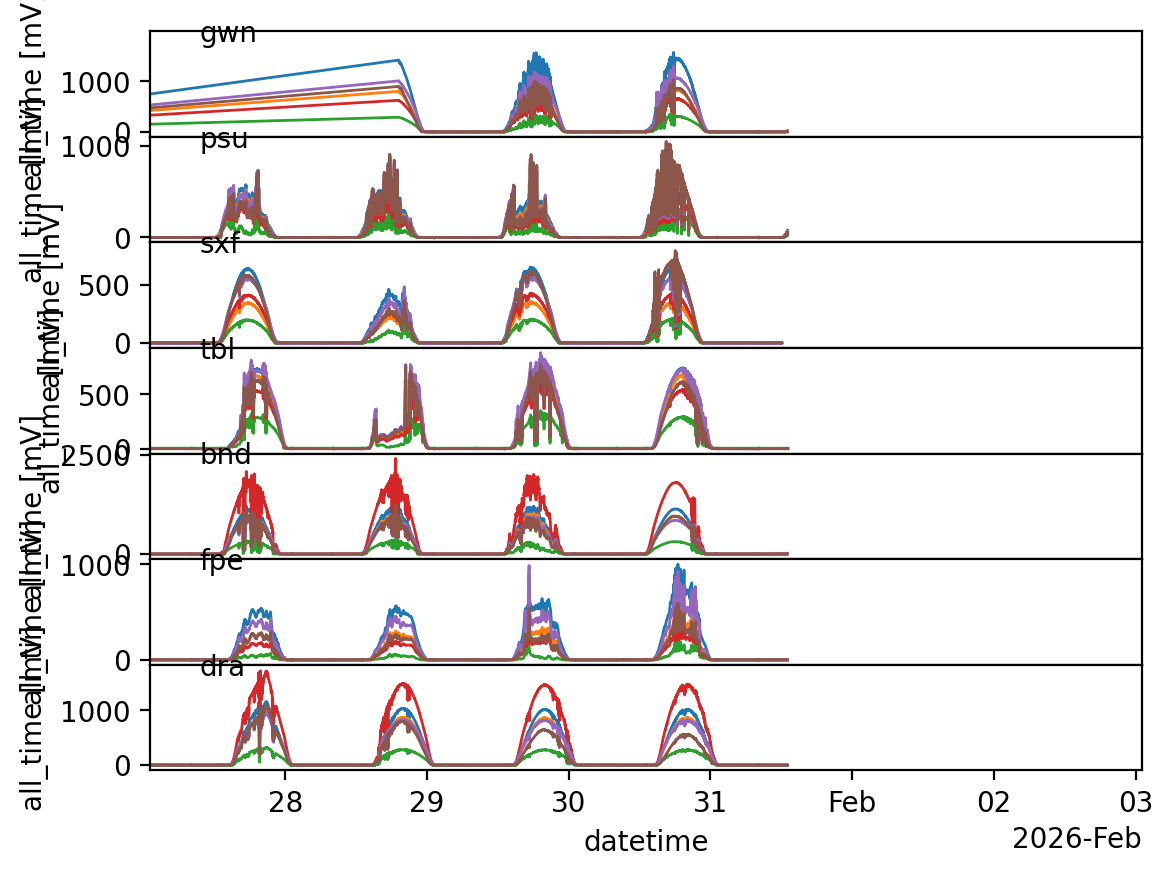

In [61]:
f, aa = plt.subplots(len(data.keys()), sharex=True, gridspec_kw={'hspace': 0})
for e,s in enumerate(data):
    a = aa[e]
    ds  = data[s]
    ds.all_time.plot.line(x='datetime', ax = a, lw = 1)
    a.legend().remove()
    a.text(0.05, 0.9, s, transform = a.transAxes)

end = pd.Timestamp.now(tz = 'UTC')
start = end - pd.to_timedelta(days, 'D')
aa[-1].set_xlim(start, end)

In [58]:
ds

<xarray.Dataset> Size: 6MB
Dimensions:             (datetime: 24118, channel: 6)
Coordinates:
  * datetime            (datetime) datetime64[ns] 193kB 2026-01-22T06:00:00 ....
  * channel             (channel) int64 48B 415 500 1625 670 870 940
Data variables:
    temp_sensor         (datetime) int64 193kB 3005 3005 3005 ... 3011 3011 3011
    broadband           (datetime) float64 193kB 23.0 23.0 23.0 ... 33.0 35.0
    all_time            (datetime, channel) float64 1MB 0.0 0.0 ... 10.0 8.0
    global_horizontal   (datetime, channel) float64 1MB nan nan nan ... nan nan
    diffuse_horizontal  (datetime, channel) float64 1MB nan nan nan ... nan nan
    direct_normal       (datetime, channel) float64 1MB nan nan nan ... nan nan
    airmass             (datetime) float64 193kB -1.0 -1.0 -1.0 ... 30.23 29.68
    solar_azimuth       (datetime) float64 193kB 350.2 350.5 ... 111.1 111.2
    solar_elevation     (datetime) float64 193kB -75.23 -75.24 ... 0.6 0.65
    solar_zenith        (datetime) float64 193kB 165.2 165.2 ... 89.4 89.35
Attributes:
    info:             Cosine corrected SURFRAD MFRSR measurments.
    site_latitude:    34.2547
    site_longitude:   -89.8729
    site_elevation:   98
    site_name:        Goodwin Creek
    site:             gwn
    instrument_type:  MFRSR
    serial_no:        632
    calfile_path:     None
    product_name:     raw
    product_version:  1.0

# Toold

## Delete all raw netcdf data in last x days (this will trigger reprocessing)

In [14]:
version = '0.3'
days = 4
# p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/raw.netcdf/v0.3/2026/
# p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/v0.3/2026/
p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/{site}/mfrsr/raw.netcdf/v{version}/2026/'

In [15]:
# Load data
sites = ['gwn', 'psu', 
         'sxf', 'tbl', 'bnd', 'fpe', 'dra'
        ]
data = {}
for s in sites:
    # print(s)
    fl = list(pl.Path(p2fld.format(site = s, version = version)).glob('*.nc'))
    fl.sort()
    
    fl = fl[- days:]
    for p2f in fl:
        p2f.unlink()
    # ds = xr.open_mfdataset(fl[- days:])
    
    # data[s] = ds

In [16]:
fl

[PosixPath('/Volumes/grad/Inst/MFR/SURFRAD/dra/mfrsr/raw.netcdf/v0.3/2026/dra_mfrsr_raw_20260210.nc'),
 PosixPath('/Volumes/grad/Inst/MFR/SURFRAD/dra/mfrsr/raw.netcdf/v0.3/2026/dra_mfrsr_raw_20260211.nc'),
 PosixPath('/Volumes/grad/Inst/MFR/SURFRAD/dra/mfrsr/raw.netcdf/v0.3/2026/dra_mfrsr_raw_20260212.nc'),
 PosixPath('/Volumes/grad/Inst/MFR/SURFRAD/dra/mfrsr/raw.netcdf/v0.3/2026/dra_mfrsr_raw_20260213.nc')]

In [106]:
fl[- 2:]

[PosixPath('/Volumes/grad/Inst/MFR/SURFRAD/gwn/mfrsr/raw.netcdf/v0.3/2026/gwn_mfrsr_raw_20260203.nc'),
 PosixPath('/Volumes/grad/Inst/MFR/SURFRAD/gwn/mfrsr/raw.netcdf/v0.3/2026/gwn_mfrsr_raw_20260204.nc')]

In [103]:
len(fl)

33

In [102]:
days

7